Chelsea Zackey

CIS 5526: HW 2

9/24/2020

# Homework 2: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

k-Nearest Neighbor (kNN) algorithm uses a simple idea: "you are what your neighbors are". In the first part of the assignment, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Part A: kNN Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [2]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with features `data` (a 150x4 matrix, where $i$-th row are 4 features of the $i$-th flower), `feature_names` (the names of the 4 features), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in machine learning people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [3]:
print(iris.DESCR)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So, we can see that the features of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In machine learning, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 features and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose features are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it (it is guaranteed to run with Python 2.7).

<Figure size 432x288 with 0 Axes>

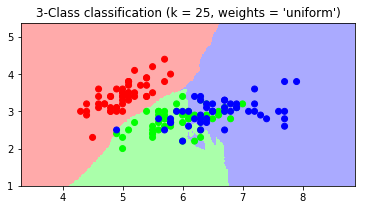

In [4]:
#k = 1   # how many nearest neighbors are consulted
#k = 3 # change total nearest neighbors (Question 1)
k = 25 # change total nearest neighbors (Question 2)

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
#clf = neighbors.KNeighborsClassifier(k, weights='distance') # Question 3 -CZ
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.

**Soln 1**: After initially having k set to 1, we see that upon setting k=3, the boundaries of the areas predicted to belong to each target label become more refined; i.e., smoother with less irregularities (curves, "islands"/"peninsulas", "spotting", etc.). Focusing solely on the scatter plot, we see that our known Iris-Versicolour (target=1/"green") target points and Iris-Virginica (target=2/"blue") target points share significant similarities in their reported values for the two features we examine (sepal length and width); in other words, it appears these two classes of irises cannot be readily distinguished from their sepals alone, as they are oftentimes too similar. Moreover, this fact leads to the complex enmeshment of the decision boundaries drawn for these classes above due to perceived "outliers" from each class. Hence, upon increasing the neighborhood size from 1 to 3, we notice a change particularly around these outlier points, as their influence on the predicted labels for the areas of the graph surrounding them become overruled by the predominant class in that area. 

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

**Soln 2**: Upon changing k to 25, we see even less irregularities (and more smoothness) along the decision boundaries drawn up between the green and blue target classes. However, this comes at the cost of decreased prediction accuracy when determining the labels of data points belonging to both classes that fall within the areas of increased enmeshment. Intuitively, when increasing the neighborhood drawn up for these points past a certain size, we can expect the influence of the neighbors sharing the same label of a given point to be overshadowed by that of neighbors with different labels, depending on where exactly our target point falls on the graph, thus leading to this decrease in accuracy.  

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.

**Soln. 3**: Upon switching `weights` from the `uniform` setting to the `distance` setting, our classifier will place greater importance on the targets of the neighbors closest to our examined data point out of all k neighbors we consider. This is accomplished by attaching a weight to a neighbor's influence based on the inverse of its distance from our target point. Thus, instead of making predictions based on the majority target class among the k neighbors examined for a given point (as when `weights='uniform'`), the classifier chooses the target label of greatest weight within the given neighborhood. 

When `k=1`, there appears to be no difference (as expected, for weights don't matter when we only examine 1 neighbor). Upon increasing `k=3`, however, we do see that adjusting prediction weights in this way does have an affect on the decision boundaries plotted by our classifier: for example, we can see adjustments in the decision boundaries drawn where "outliers" of a target class are found in an area of the graph where members of a different class are more predominant. Since the outlier would be considered one of the closest neighbors of any point falling in the surrounding area, the classifier may adjust its predicted labels for the subset of points for which this outlier "outweighs" the influence of all other k-1 nearest neighbors. Hence, the outcome here is a greater radius around certain outliers sharing the same target label, instead of that of the neighborhood majority. 

**Question 4**. Take a look at the code and try to understand what each line of the code does. Explain each line of code.

**Soln 4**: 
`k = 1
X = iris.data[:, [0,1]]
y = iris.target
h = .02` 

In the above lines of code, we specify important parameters used by our kNN claassifier, particularly the number of neighbors examined, the data set of examples we consult (in this case, we limit our analysis to the first two features listed in `iris.feature_names`: sepal length and sepal width), the targets corresponding to each example, and the interval length between the tick marks included in the axis used for the plot we later generate. 

`cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])`

The next lines of code above are used to indicate the colors we choose to mark the data points belonging to each target class (`cmap_bold`), and the areas of the graph where each target class lives (`cmap_light`), according to the predictions of our kNN classifier. Each color is assigned to the target class that shares the same index in `iris.target_names` (e.g., setosa irises and the area they comprise on the graph will be displayed in red). 

`clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)`

The next two lines of code above first instantiate the `KNeighborsClassifier` class using our identifier `clf`, then use the iris data set `X` with targets `y` to "fit" the model, i.e., use these known values in `X` and `y` as training data to base the classifier's predictions off of. 

`x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])`

The first two lines above now identify the minimum and maximum values reported for the first feature (sepal length) and second feature (sepal width) that we examine in our data set, which are used in tandem with our step size `h` to create our graph's x and y axes, respectively, in the following line of code. The last line above uses the variable `Z` to store the predicted labels comprising each area of the shape created by our x and y axes (`xx` and `yy`) as determined by our classifier `clf`. The parameter `np.c_[xx.ravel(), yy.ravel()]` is the shape we provide for `clf` by first smoothing out our axes (making them appear continous) and using them to conjure up a 2D plane. 

`Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3)) 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)`

In the following lines of code above, we begin to generate a color map representation of our predictions: first, we recalibrate our predictions `Z` to share the same shape as our x axis `xx`. Next, we instantiate a new plot figure and adjust its figure size. Finally, we create a 2D color map of the predictions in `Z` (with values for sepal length and width measured on the x and y axes, respectively) using the target class colors specified in `cmap_light`. 

`plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()`

Finally, the last lines of codes first generate a scatter plot to overlay the color map in our plot figure, using sepal length and width as the x and y coordinates of each data point, respectively. Furthermore, the iris target values stored in `y` are used to determine the color of each point, and the choices of which are specified in `cmap_bold`. Next, the code sets the limits of the axes using our specified min and max values reported by each of the two features, attaches a title to our plot, then prints it for us to view. 



### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
# print(len(y_test)) #verification for Question 5 -CZ

**Question 5**. What is the size of the resulting objects?

**Soln 5**: We are originally given a data set comprising 150 entries; thus, upon specifying test size of 0.33 (one-third of the size of our data set) for the method `train_test_split`, we should have 100 entries (a 100x4 matrix, accounting for our 4 features) for `X_train`, 100 targets for `y_train`, 50 entries (a 50x4 matrix) for `X_test`, and 50 targets for `y_test`. 

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [6]:
#from sklearn.neighbors import KNeighborsClassifier
#k = 1   # number of nearest neighbors
#k = 3 # Question 9
k = 5 #Question 9
#k = 15 #Question 9
#k = 25 # Question 9
#k = 50 #Question 9
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

KNeighborsClassifier()


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [7]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print(x)
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
result = zip(yhat, y_test[i])
print(list(result))

[[6.  2.2]
 [5.2 4.1]
 [5.8 2.7]
 [5.4 3.7]]
[(1, 2), (0, 0), (1, 1), (0, 0)]


**Question 6**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 

**Soln 6**: Yes, the predictor determined the targets of 3 out of the 4 test examples correctly.

**Question 7**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses

**Soln 7**: The below code has calculated 75% prediction accuracy for the first 4 test examples. 

**Question 8**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 7*.

**Soln 8**: Running the below code prints the predictions for all 50 test examples beside their corresponding true target values, along with the newly determined test accuracy of 80%.

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 7 and 8):

In [8]:
# Code for question 7
c = 0 # counter for correct predictions
result = list(zip(yhat, y_test[i]))
for j in range(len(result)):
    if result[j][0] == result[j][1]:
        c += 1
print("Test 1 accuracy: "+str(c/len(result)))

#Code for question 8
yhat = predictor.predict(X_test) # Find predictions for all test samples
res = list(zip(yhat, y_test)) #join predictions with corresponding true values
print("Test 2 results: ")
print(res)
c = 0 # counter for correct predictions
for j in range(len(res)):
    if res[j][0] == res[j][1]:
        c += 1
print("Test 2 accuracy: "+str(c/len(res)))

Test 1 accuracy: 0.75
Test 2 results: 
[(1, 2), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (1, 2), (1, 2), (0, 0), (2, 2), (2, 1), (0, 0), (2, 1), (0, 0), (1, 2), (0, 0), (1, 2), (0, 0), (2, 2), (1, 1), (1, 1), (1, 2), (1, 2), (1, 2), (2, 2), (1, 1), (1, 1), (2, 2), (0, 0), (1, 1), (0, 0), (2, 2), (2, 2), (2, 1), (2, 2), (2, 2), (0, 0), (2, 2), (2, 1), (1, 1), (0, 0), (2, 2), (2, 1), (0, 0), (1, 1), (2, 2), (0, 0)]
Test 2 accuracy: 0.74


In [9]:
accuracy = predictor.score(X_test,y_test)
print(accuracy)

0.74


**Question 9**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

**Soln 9**: The accuracies pertaining to each choice of `k` (all applied to the exact same testing & training instances of the data) are as follows:

k=1: 0.72

k=3: 0.78

k=5: 0.75

k=15: 0.74

k=25: 0.74

k=50: 0.68

Based on the above statistics, it appears that when `k = 3`, our predictor achieves its greatest accuracy for the given test instance. This appears to make sense given our discussion above, regarding the fact that the green and blue iris classes share strong similarities in sepal shape & size (i.e., similar values in the reported sepal length & width features). In light of this, analyzing just one nearest neighborhood could lead to inaccuracies when predicting the targets of points that have strayed far from areas comprising a majority of members from their target class. By the same token, depending on just how far any given point or handful of points have strayed, it isn't helpful to examine a relatively large neighborhood either, as any neighbors of the same target class will begin to have less influence on the classifier's prediction. Based on what we see from the above scatter plot, most data points found along the boundary between the green and blue target areas are close enough to at least two other points of the same class to be labeled correctly upon setting `k=3`. 

**Question 10**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

**Soln 10**: Aside from those that we have already worked with, `KNeighborsClassifier` allows you adjust the metric you wish to use when defining "nearness" (along with necessary parameters), the algorithm you wish to use when finding nearest neighbors (along with necessary parameters), and the number of jobs you wish to create upon deciding to run neighbor searches in parallel. 

**Question 11**. Train kNN classifier on a different pair of features of your choice. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of features results in higher accuracy?

**Soln. 11**: Training the kNN classifier with default parameters and setting k = 5, we obtain the following prediction accuracies per each pair of features:

Sepal Length + Sepal Width (0, 1): 0.94

Sepal Length + Petal Length (0, 2): 0.98

Sepal Length + Petal Width (0, 3): 0.94

Sepal Width + Petal Length (1, 2): 0.94

Sepal Width + Petal Width (1, 3): 0.94

Petal Length + Petal Width (2, 3): 0.94

From the above results, we see that training our kNN Classifier using the first and third features (sepal length and petal length) yields the greatest prediction accuracy (98%) out of all possible pairs of features, with all other feature pairs yielding the same prediction accuracy (94%) for this instance, implying that neither of these pairs are better indicators of Iris type than the others.  

**Question 12**. Train kNN classifier using all 4 features. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?

**Soln 12**: The accuracies pertaining to each choice of `k` (applied to the same testing & training instances of the data with default metrics) are as follows:

k=1: 0.94 (distance weights: 0.94)

k=3: 0.96 (distance weights: 0.96)

k=5: 0.98 (distance weights: 0.96)

k=15: 0.96 (distance weights: 0.96)

k=25: 0.94 (distance weights: 0.96)

k=50: 0.9 (distance weights: 0.94)

Based on the above statistics, it appears that when `k = 5` and `weights = 'uniform'`, our predictor achieves its greatest accuracy for this instance. Moreover, it appears that using 'distance' weights for above values of `k` exceeding 15 generally increases accuracy by at least a couple of percentage points. 

In general, upon applying this method across different testing & training instances and values for `k`, `weights`, and `metric` (namely the Euclidiean, Manhattan and Chebyshev metrics), we observe the following:

1. Very high prediction accuracies across all values of `k` setting `weights='distance'` in tandem with the Manhattan metric (98% accuracy in each case).
2. Even greater prediction accuracies setting `weights='distance'` in tandem with the Chebyshev metric (98% accuracy for k = 1, 3, 25, 50, and 100% accuracy for k = 5 and 15). 
3. Decreased accuracy when using the above parameters in tandem with setting `weights=uniform`. 

Based on the observations reported above, we can expect that on average, using `distance` weighting in our predictions with either the Manhattan or Chebysheve metrics will yield the greatest prediction accuracies from the `kNeighborsClassifier` on subsets of the Iris data set.

In [10]:
#Question 11 Code
#recalibrate data set to include different feature pairs
# features = [sepal length, sepal width, petal length, petal width]
i = [0, 2] # determines which features are being used
X = iris.data[:, i]  # train on new features
y = iris.target
#resplit data for training & testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

In [11]:
# Question 11 Code (cont.)
k = 5

#recalibrate predictor
predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights='uniform')
predictor.fit(X_train, y_train)

#run new tests
yhat = predictor.predict(X_test) # Find predictions for all test samples
res = list(zip(yhat, y_test)) #join predictions with corresponding true values
print("Test results: ")
print(res)

#print accuracy
acc = predictor.score(X_test,y_test)
print("Accuracy: "+str(accuracy))

Test results: 
[(2, 2), (1, 2), (1, 1), (0, 0), (0, 0), (1, 1), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (1, 1), (2, 2), (1, 1), (2, 2), (1, 1), (2, 2), (1, 2), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (2, 2), (1, 2), (1, 1), (1, 1), (0, 0), (2, 2), (1, 2), (0, 0), (0, 0), (1, 1), (2, 2), (1, 1), (2, 2), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 2), (0, 0), (1, 1), (1, 1), (1, 2), (0, 0), (0, 0), (0, 0)]
Accuracy: 0.74


In [31]:
#Question 12 Code
#recalibrate data set to include all features
X = iris.data[:, [0,1, 2, 3]]  # train on all features
y = iris.target
#resplit data for training & testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

In [59]:
# Question 12 Code (cont.)
from sklearn.neighbors import DistanceMetric
#change num neighbors
#k = 1
#k = 3
#k = 5
#k = 15
#k = 25
k = 50



#def weightedSepPetLen(x, y):
# method calculating distance in a way that places greater importance on 
# distance along Sepal + Petal Length
#    if (((x[0] - y[0])**2)+((x[2] - y[2])**2)) <= (((x[1]-y[1])**2)+((x[3]-y[3])**2)):
#        d = ((x[0] - y[0])**2)/10+((x[1]-y[1])**2)+((x[2] - y[2])**2)/10+((x[3]-y[3])**2)
#    else:
#        d = (x[0] - y[0])**2+(x[1]-y[1])**2+(x[2] - y[2])**2+(x[3]-y[3])**2
#    return math.sqrt(d)

#recalibrate predictor
predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights='uniform', metric='chebyshev')
predictor.fit(X_train, y_train)

#print predictor results
yhat = predictor.predict(X_test) # Find predictions for all test samples
res = list(zip(yhat, y_test)) #join predictions with corresponding true values
print("Predictor results: ")
print(res)

#print accuracy
accuracy = predictor.score(X_test,y_test)
print("Accuracy: "+str(accuracy))

Predictor results: 
[(1, 1), (1, 2), (2, 2), (2, 2), (2, 2), (1, 1), (1, 2), (1, 2), (1, 1), (2, 2), (2, 2), (1, 1), (2, 2), (0, 0), (0, 0), (0, 0), (2, 2), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (2, 2), (0, 0), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (0, 0), (1, 1), (1, 1), (2, 1), (0, 0), (2, 2), (0, 0), (2, 2), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1)]
Accuracy: 0.92


## Part B: Write your own function for kNN (50% of the score)

**Question 13** Write a function for k-nearest neighbor (k-NN) classification of the form `accuracy = knnC(X_test, y_test, X_train, y_train, k)`, where `k` is the number of nearest neighbors. Assume the Euclidean distance. So, the inputs are training and test data and the output should be accuracy on test data. Repeat **Question 9** using your function. Check if the results are the same.

**NOTE:** I know that you can find python code for this on Web. However, I specifically ask you to write this function on your own and not use anybody's help. This is one of the rare ML algorithms that can be quickly implemented. I think you will learn a lot from this experience that will be very useful for the remainder of this course.


In [37]:
# Write new kNN function for Question 13 -CZ
import math
def sortDist(x): 
# method returning key value used for sorting in knnC
    return x[0] # assumes x[0] is distance field associated with x
def get_accuracy(results): 
# method returning calculated accuracy of knnC predictions contained in results
    c = 0 # counter for correct predictions
    for r in results:
        if r[0] == r[1]: #compare predicted and true target values
            c+=1
    return c/len(results)
def EucDist(x, y):
# method returning Euclidean distance btwn points x & y
    d = 0 # distance variable
    for i in range(len(x)): # calculate Euclidean distance using all features
        d += (x[i]-y[i])**2 # summate squared difference btwn feature values
    return math.sqrt(d)

def predict(n, k):
# method returning predicted target 
# upon finding the majority target class in list of neighbors n
    t0, t1, t2 = 0, 0, 0 #counters for each target label
    for i in range(k): # count frequency of each target
        if n[i][1] == 0: # target 0
            t0+=1
        elif n[i][1] == 1: #target 1
            t1+=1
        else: #target 2
            t2+=1
    # determine target with highest frequency
    max = t0
    p = 0 # prediction variable
    if t1 > max:
        max = t1
        p = 1
    if t2 > max:
        p = 2
    return p

def knnC(X_test, y_test, X_train, y_train, k):
# Given test data set X_test (with targets y_test), training data set X_train (w targets y_train),
# and number of neighbors k, run k Nearest Neighbor algorithm (using Euclidean distance)
# and return prediction accuracy. 
    pred = list() #list to collect predictions for x in X_test
    for x in X_test: # iterate through testing set 
        n = list() #list to collect distance of neighbors and target values
        for i in range(len(X_train)): # iterate through training set
            xx = X_train[i] # next neighbor to examine
            n.append((EucDist(x, xx), y_train[i])) # add distance and target for xx to n
        # sort neighbors according to distance
        n.sort(key=sortDist)
        # begin to find majority target within first k entries of n
        t0, t1, t2 = 0, 0, 0 #counters for each target label
        for i in range(k): # count frequency of each target
            if n[i][1] == 0: # target 0
                t0+=1
            elif n[i][1] == 1: #target 1
                t1+=1
            else: #target 2
                t2+=1
        # determine prediction based on target with highest frequency
        p = predict(n, k)
        pred.append(p) # add to list of predictions for this entry x
    # Calculate accuracy     
    result = list(zip(pred, y_test)) #join predictions with corresponding true values     
    acc = get_accuracy(result)
    print("Results: ")
    print(result)
    return acc

k = 1 # number of nearest neighbors examined
accuracy = knnC(X_test, y_test, X_train, y_train, k)
print("knnC reported accuracy: "+str(accuracy))

Results: 
[(1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (1, 2), (1, 1), (2, 2), (2, 2), (1, 1), (2, 2), (0, 0), (0, 0), (0, 0), (2, 2), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (2, 2), (0, 0), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (2, 2), (0, 0), (2, 2), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1)]
knnC reported accuracy: 0.98


**Soln. 9 (repeat)**: The accuracies reported by the knnC algorithm for each choice of `k` (applied to the exact same testing & training instances of the data) are as follows:

k=1: 0.98

k=3: 0.98

k=5: 0.98

k=15: 0.98

k=25: 0.96

k=50: 0.9

Ultimately, running this algorithm in tandem with that for the `sklearn.neighbors.KNeighborsClassifier` appears to yield the exact same results. With respect to the data training & testing sets used for the above instances, our results suggest that the greatest prediction accuracy is obtained for the above values of k that do not exceed 15; beyond this point, we observe a drop in prediction accuracy. However, speaking from experience, we can expect that running our knnC algorithm on different instances of training & testing sets with `k=5` will most likely yield the greatest prediction accuracy on average, due to the similarities we've already detected between at least 2 target classes (green and blue) along at least 2 features (sepal length and width). For this same reason, these results align with expectation based on the same arguments made previously. 